In [1]:
# Se da acceso al drive desde Colab
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


### Librerias

In [2]:
# Se cargan las diferentes librerias y dependencias necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, InputLayer, Dropout, Conv1D, Conv2D, Flatten, Reshape, MaxPooling1D, MaxPooling2D, BatchNormalization, TimeDistributed, ReLU, Softmax
from keras.optimizers import RMSprop
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

### Carga de datos

              protected                                                         signature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

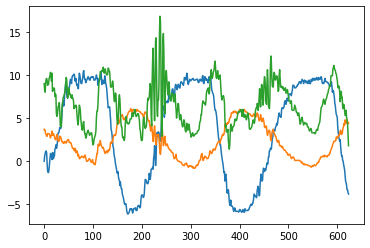

In [3]:
# Ejemplo de la carga de un archivo *.json con las mediciones de un acelerómetro
RutaFile="/content/gdrive/MyDrive/datos_secuenciales/Project_DS/training/biceps.json"
dataframe = pd.read_json(RutaFile)
print(dataframe.to_string()) 
Valores = dataframe.iloc[:,:].values
print(Valores.shape)
print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

In [4]:
# Se cargan los diferentes archivos *.json que se van a usar en el proceso
# de entrenamiento
import os
directory = '/content/gdrive/MyDrive/datos_secuenciales/Project_DS/training/'
files = os.listdir(directory)
files.sort() 
cantidadFiles = len(files)
# Variable donde se almacenaron los datos leidos de los archivos *.json
Datos=np.zeros((cantidadFiles*624,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  Datos[i*624:(i+1)*624] = DatosOriNP
  i+=1
print(Datos.shape)



(9360, 3)


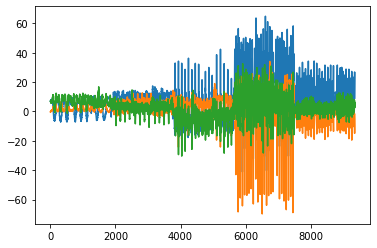

In [5]:
# Visualización de la información capturada
plt.plot(Datos)

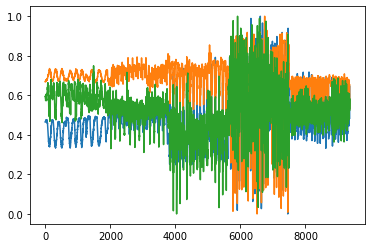

In [6]:
# Se escalan los datos para se usados por el modelo 
scaler1 = MinMaxScaler()
scaler1.fit(Datos)
DatosN=scaler1.transform(Datos)
plt.plot(DatosN)

In [7]:
# Se crea la variable para la entrada de entrenamiento del modelo 
# Las dimensiones depende del tamaño de la ventana de procesamiento de los datos.
# de la cantidad de patrones de entrenamiento que se generan y de la cantidad 
# de canales, 3 en este caso
Xtrain=np.zeros((90,104,3))

for i in range(90):
    Xtrain[i,:,0]=DatosN[i*104:(i+1)*104,0].T
    Xtrain[i,:,1]=DatosN[i*104:(i+1)*104,1].T
    Xtrain[i,:,2]=DatosN[i*104:(i+1)*104,2].T

print(Xtrain.shape)


(90, 104, 3)


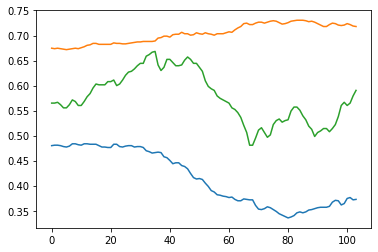

In [8]:
# Se visualiza un patrón de entrenamiento
plt.plot(Xtrain[10,:,:])

In [9]:
# Se definen las etiquetas para la salida del modelo
YtrainIni=np.zeros((90,1))
for i in range(18):
    YtrainIni[i]=0

for i in range(18,36):
    YtrainIni[i]=1

for i in range(36,54):
    YtrainIni[i]=2   

for i in range(54,72):
    YtrainIni[i]=3   

for i in range(72,90):
    YtrainIni[i]=4   

print(YtrainIni)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]


In [10]:
# Se convierten las etiquetas a codificación "one hot" que es la 
# usará el modelo
Ytrain=  keras.utils.to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0.

### Creando el modelo Con1D

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 104, 16)           160       
                                                                 
 conv1d_1 (Conv1D)           (None, 104, 32)           1568      
                                                                 
 conv1d_2 (Conv1D)           (None, 104, 64)           6208      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 52, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3328)              0         
                                                                 
 dense (Dense)               (None, 5)                 16645     
                                                        

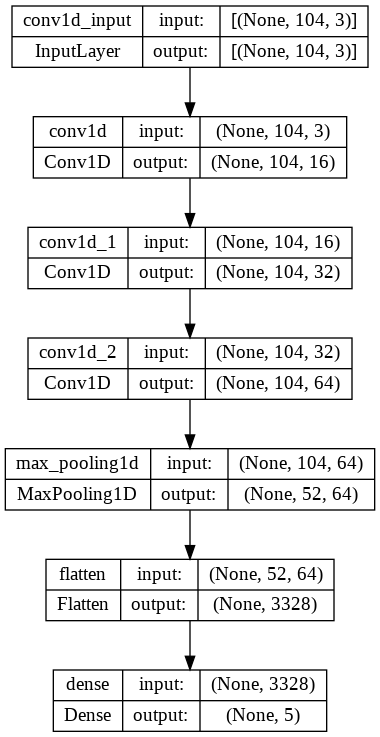

In [11]:
# Se crea el modelo secuencial en Keras con capas convolucionales 1D
# y una capa clasificadora densa tipo softmax
modelo = Sequential()
modelo.add(Conv1D(16, 3, activation="relu",padding="same", input_shape=(104,3)))
modelo.add(Conv1D(32, 3, activation="relu",padding="same"))
modelo.add(Conv1D(64, 3, activation="relu",padding="same"))
modelo.add(MaxPooling1D(pool_size=2, strides=2, padding='same'))
modelo.add(keras.layers.Flatten())
modelo.add(keras.layers.Dense(5, activation = 'softmax'))
# Se muestra el resumen de la arquitectura del modelo
modelo.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo, to_file='modelo_plot3.png', show_shapes=True, show_layer_names=True)

Cálculo de parámetros

In [12]:
#para calcular el numero de parámetros de las redes convolucionales seguiremos la siguiente formula
#(kernelsize * input_ch + bias) * n_filter. tambien se debe de tener en cuenta el numero de filtros de la capa anterior
#numero de filtros de la capa actual = c
#numero de filtros de la capa anterior = p
n_canal = 3
n_clases = 5
bias = 1
c = [16,32,64]
p = c
numero_parametros_1 = (c[0] * (n_canal * n_canal + bias))
print("Capa Conv1D_1: {} \n".format(numero_parametros_1))
numero_parametros_2 = (((n_canal * c[0]) + bias) * p[1])
print("Capa Conv1D_2: {} \n".format(numero_parametros_2))
numero_parametros_3 = (((n_canal * c[1]) + bias) * p[2])
print("Capa Conv1D_3: {} \n".format(numero_parametros_3))
numero_parametros_4 = ((n_clases * 3328)+ bias * n_clases)
print("Capa de salida: {} \n".format(numero_parametros_4))
total = numero_parametros_1 + numero_parametros_2 + numero_parametros_3 + numero_parametros_4
print("Parametros totales: {}".format(total))

Capa Conv1D_1: 160 

Capa Conv1D_2: 1568 

Capa Conv1D_3: 6208 

Capa de salida: 16645 

Parametros totales: 24581


In [13]:
# Se compila y entrena el modelo
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = modelo.fit(Xtrain,Ytrain, epochs=250,batch_size=32)


Epoch 1/250
3/3 [==============================] - 1s 18ms/step - loss: 1.6445 - accuracy: 0.2222
Epoch 2/250
3/3 [==============================] - 0s 17ms/step - loss: 1.5853 - accuracy: 0.2556
Epoch 3/250
3/3 [==============================] - 0s 18ms/step - loss: 1.5630 - accuracy: 0.3333
Epoch 4/250
3/3 [==============================] - 0s 15ms/step - loss: 1.5294 - accuracy: 0.5667
Epoch 5/250
3/3 [==============================] - 0s 16ms/step - loss: 1.4929 - accuracy: 0.5556
Epoch 6/250
3/3 [==============================] - 0s 16ms/step - loss: 1.4247 - accuracy: 0.5889
Epoch 7/250
3/3 [==============================] - 0s 16ms/step - loss: 1.3471 - accuracy: 0.5889
Epoch 8/250
3/3 [==============================] - 0s 17ms/step - loss: 1.2663 - accuracy: 0.5111
Epoch 9/250
3/3 [==============================] - 0s 15ms/step - loss: 1.1766 - accuracy: 0.5444
Epoch 10/250
3/3 [==============================] - 0s 20ms/step - loss: 1.0762 - accuracy: 0.7000
Epoch 11/250
3/3 [=

### Graficas del modelo

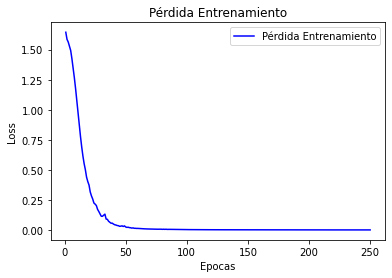

In [14]:
# Se gráfica la evolución de la pérdida durante el entrenamiento
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()


(3120, 3)


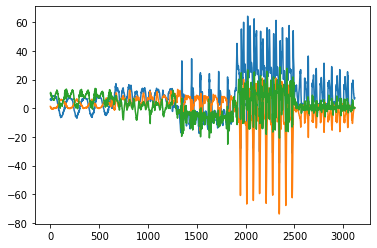

In [16]:
# Se cargan los diferentes archivos *.json que se van a usar en el proceso
# de testeo

import os
directory = '/content/gdrive/MyDrive/datos_secuenciales/Project_DS/testing/'
files = os.listdir(directory)
files.sort() 

cantidadFiles = len(files)

DatosVal=np.zeros((cantidadFiles*624,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  DatosVal[i*624:(i+1)*624] = DatosOriNP
  i+=1
print(DatosVal.shape)
plt.plot(DatosVal)

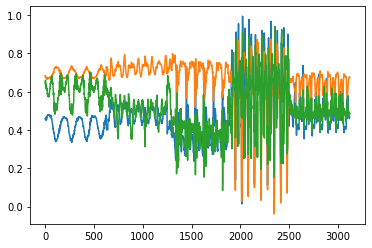

In [17]:
# Se escalan los datos de testeo
DatosValN=scaler1.transform(DatosVal)
plt.plot(DatosValN)

In [18]:
# Se crea la variable para el testeo del modelo 
# Las dimensiones depende del tamaño de la ventana de procesamiento de los datos.
# de la cantidad de patrones de entrenamiento que se generan y de la cantidad 
# de canales, 3 en este caso
XVal=np.zeros((30,104,3))

for i in range(30):
    XVal[i,:,0]=DatosValN[i*104:(i+1)*104,0].T
    XVal[i,:,1]=DatosValN[i*104:(i+1)*104,1].T
    XVal[i,:,2]=DatosValN[i*104:(i+1)*104,2].T

print(XVal.shape)


(30, 104, 3)


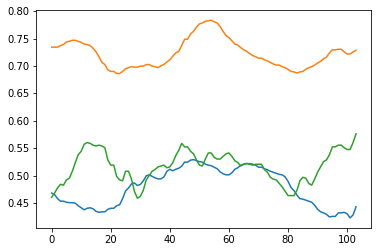

In [19]:
# Se grafica uno de los patrones que se usarán en el testeo
plt.plot(XVal[10,:,:])

In [20]:
# Se definen las etiquetas para la salida del modelo
YValIni=np.zeros((30,1))
for i in range(6):
    YValIni[i]=0

for i in range(6,12):
    YValIni[i]=1

for i in range(12,18):
    YValIni[i]=2   

for i in range(18,24):
    YValIni[i]=3

for i in range(24,30):
    YValIni[i]=4    

print(YValIni)
# Se convierten las etiquetas a codificación "one hot" que es la 
# usará el modelo
YVal= keras.utils.to_categorical(YValIni)

print(YVal)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]
 [4.]]
[[1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1.]]


In [21]:
# Se evalua el modelo con los datos de testeo
loss,acc = modelo.evaluate(XVal, YVal)
print("accuracy:{}".format(100*acc))

1/1 [==============================] - 0s 246ms/step - loss: 0.0300 - accuracy: 0.9667
accuracy:96.66666388511658


1/1 [==============================] - 0s 26ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       0.86      1.00      0.92         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      0.83      0.91         6

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[6 0 0 0 0]
 [0 6 0 0 0]
 [0 0 6 0 0]
 [0 0 0 6 0]
 [0 1 0 0 5]]


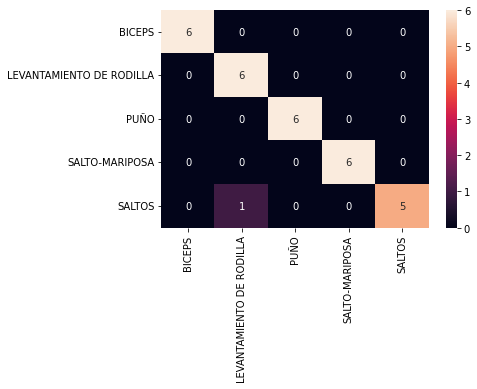

In [30]:
# Se calculan las métricas del modelo con los datos de testeo incluyendo la 
# matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


ypredic=modelo.predict(XVal)
labels =['BICEPS','LEVANTAMIENTO DE RODILLA','PUÑO','SALTO-MARIPOSA','SALTOS']
y_test_class = np.argmax(YVal,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm,xticklabels=labels, yticklabels=labels, annot=True, fmt="d")




### Modelo MLP

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 104, 256)          1024      
                                                                 
 dense_2 (Dense)             (None, 104, 256)          65792     
                                                                 
 dense_3 (Dense)             (None, 104, 256)          65792     
                                                                 
 flatten_1 (Flatten)         (None, 26624)             0         
                                                                 
 dense_4 (Dense)             (None, 5)                 133125    
                                                                 
Total params: 265,733
Trainable params: 265,733
Non-trainable params: 0
_________________________________________________________________


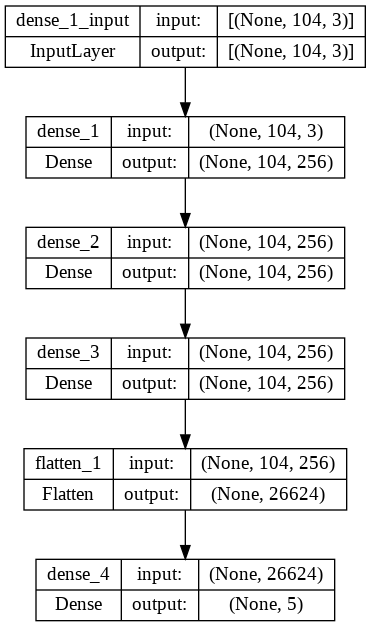

In [23]:
mlp = Sequential()
mlp.add(Dense(256, input_shape=(104,3), activation='relu')) 
mlp.add(Dense(256, activation='relu')) 
mlp.add(Dense(256, activation='relu'))
mlp.add(Flatten())
mlp.add(Dense(5, activation='softmax')) 

# summary
mlp.summary()
keras.utils.plot_model(mlp, to_file='modelo_plot3.png', show_shapes=True, show_layer_names=True)

Cálculo de parámetros

In [24]:
#El numero de parametros de las capas densas dependeran de la entrada, la salida entre ellas
#para realizar este calculo necesitaremos del numero de canal de la neurona actual, que en nuestro caso es de 3
#y sumaremos 1 bias. luego tendremos que multiplicarlo por el numero de neuronas de la capa anterior

#numero de neuronas de la capa actual = c
#numero de neuronas de la capa anterior = p
n_canal = 3
n_clases = 5
bias = 1
c = [256,256,256]
p = c
numero_parametros_1 = (n_canal + bias) * c[0]
print("Capa densa_1: {} \n".format(numero_parametros_1))
numero_parametros_2 = (c[0] + bias) * p[1]
print("Capa densa_2: {} \n".format(numero_parametros_2))
numero_parametros_3 = (c[1] + bias) * p[2]
print("Capa densa_3: {} \n".format(numero_parametros_3))
numero_parametros_4 = ((n_clases * 26624)+ bias * n_clases)
print("Capa de salida: {} \n".format(numero_parametros_4))
total = numero_parametros_1 + numero_parametros_2 + numero_parametros_3 + numero_parametros_4
print("Parametros totales: {}".format(total))

Capa densa_1: 1024 

Capa densa_2: 65792 

Capa densa_3: 65792 

Capa de salida: 133125 

Parametros totales: 265733


In [25]:
# Se compila y entrena el modelo
mlp.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = mlp.fit(Xtrain,Ytrain, epochs=30,batch_size=None)

Epoch 1/30
3/3 [==============================] - 1s 130ms/step - loss: 1.7037 - accuracy: 0.2444
Epoch 2/30
3/3 [==============================] - 0s 133ms/step - loss: 1.5778 - accuracy: 0.3222
Epoch 3/30
3/3 [==============================] - 0s 148ms/step - loss: 1.5202 - accuracy: 0.4000
Epoch 4/30
3/3 [==============================] - 1s 277ms/step - loss: 1.3938 - accuracy: 0.4889
Epoch 5/30
3/3 [==============================] - 1s 325ms/step - loss: 1.2302 - accuracy: 0.5667
Epoch 6/30
3/3 [==============================] - 1s 183ms/step - loss: 1.0427 - accuracy: 0.6556
Epoch 7/30
3/3 [==============================] - 0s 146ms/step - loss: 0.8852 - accuracy: 0.7222
Epoch 8/30
3/3 [==============================] - 1s 192ms/step - loss: 0.7012 - accuracy: 0.8333
Epoch 9/30
3/3 [==============================] - 1s 180ms/step - loss: 0.5869 - accuracy: 0.9000
Epoch 10/30
3/3 [==============================] - 1s 164ms/step - loss: 0.4569 - accuracy: 0.9222
Epoch 11/30
3/3 [==

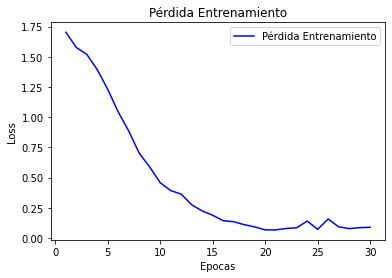

In [26]:
# Se gráfica la evolución de la pérdida durante el entrenamiento
perdida_train = historia.history['loss']
epocas = range(1, len(perdida_train) + 1)

plt.plot(epocas, perdida_train, 'b', label='Pérdida Entrenamiento')
plt.title('Pérdida Entrenamiento')
plt.xlabel('Epocas')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [27]:
# Se evalua el modelo con los datos de testeo
loss,acc = mlp.evaluate(XVal, YVal)
print("accuracy:{}".format(100*acc))

1/1 [==============================] - 0s 248ms/step - loss: 0.0914 - accuracy: 0.9667
accuracy:96.66666388511658


1/1 [==============================] - 0s 52ms/step
              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      0.83      0.91         6
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         6

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

[[6 0 0 0 0]
 [1 5 0 0 0]
 [0 0 6 0 0]
 [0 0 0 6 0]
 [0 0 0 0 6]]


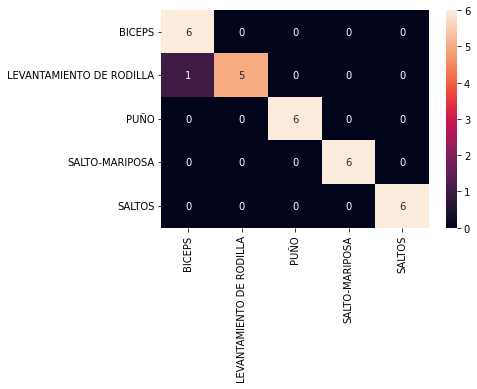

In [29]:
# Se calculan las métricas del modelo con los datos de testeo incluyendo la 
# matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

labels =['BICEPS','LEVANTAMIENTO DE RODILLA','PUÑO','SALTO-MARIPOSA','SALTOS']
ypredic=mlp.predict(XVal)

y_test_class = np.argmax(YVal,axis=1) 
y_pred_class = np.argmax(ypredic,axis=1) 

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, xticklabels=labels, yticklabels=labels, annot=True, fmt="d")